# Import modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

2022-07-03 15:36:35.268021: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-03 15:36:35.272163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 15:36:35.272174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Take dataset

In [5]:
df=pd.read_csv("../Data/Admission_Predict_Ver1.1.csv")
df=df.drop("Serial No.",axis=1) # don't use Serial No. column
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Display dataset

<AxesSubplot:>

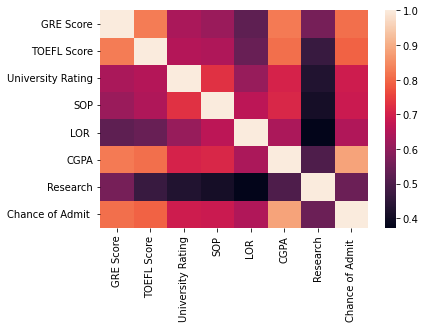

In [9]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Create model
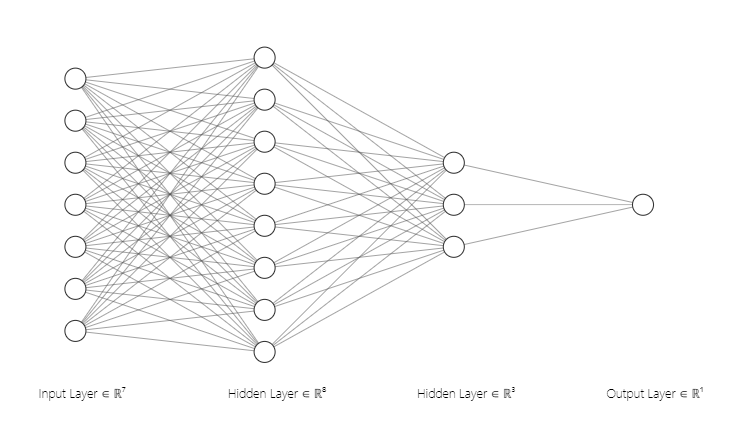

In [10]:
model = Sequential(name = 'Regression')
# 8 nodes in hidden layer 1, 7 nodes in input layer
model.add(Dense(8, input_shape=(7,), activation='relu')) 
# Nếu input chỉ có 1 chiều thì bắt buộc phải dể trống giá trị thứ 2 của tuple (dimenson, )
# activation: https://faroit.com/keras-docs/2.0.2/layers/core/#activation
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))
# Set up thông số
model.compile(loss='mean_squared_error', optimizer='adam')
# compile: dùng để thiết lập hàm loss, optimizer
# loss: 'mean_squared_error', 'binary_crossentropy'... xem thêm: https://faroit.com/keras-docs/2.0.2/losses/
# optimizer: 'adam', 'sgd', 'rmsprop', 'adagrad'... xem thêm: https://faroit.com/keras-docs/2.0.2/optimizers/
model.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


# Tách X, Y

In [11]:
X=np.asarray(df.drop("Chance of Admit ",axis=1)) # axis ???
Y=np.asarray(df["Chance of Admit "])

# Train-test split, scale

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=1)
from sklearn.preprocessing import MinMaxScaler # scalling
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Train 

In [13]:
# Một Epoch được tính là khi đưa tất cả dữ liệu vào mạng neural network 1 lần.
# Batch - chia toàn bộ data thành nhiều gói dữ liệu nhỏ hơn để đưa vào mạng neuron. 
# Để hoành thành một epoch sẽ cần nhiều lần chạy (iteration) hơn
history = model.fit(x=X_train, y=y_train, epochs=40, batch_size = 3) 

Epoch 1/40
134/134 [==============================] - 0s 744us/step - loss: 0.4252
Epoch 2/40
134/134 [==============================] - 0s 736us/step - loss: 0.0225
Epoch 3/40
134/134 [==============================] - 0s 725us/step - loss: 0.0088
Epoch 4/40
134/134 [==============================] - 0s 728us/step - loss: 0.0062
Epoch 5/40
134/134 [==============================] - 0s 738us/step - loss: 0.0054
Epoch 6/40
134/134 [==============================] - 0s 725us/step - loss: 0.0049
Epoch 7/40
134/134 [==============================] - 0s 712us/step - loss: 0.0047
Epoch 8/40
134/134 [==============================] - 0s 730us/step - loss: 0.0045
Epoch 9/40
134/134 [==============================] - 0s 720us/step - loss: 0.0044
Epoch 10/40
134/134 [==============================] - 0s 733us/step - loss: 0.0043
Epoch 11/40
134/134 [==============================] - 0s 682us/step - loss: 0.0042
Epoch 12/40
134/134 [==============================] - 0s 940us/step - loss: 0.0042
E

# Plot history

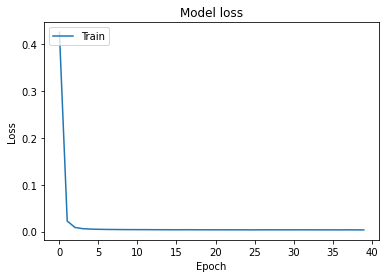

In [14]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left') # legend ???
plt.show()

# evualating

In [15]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


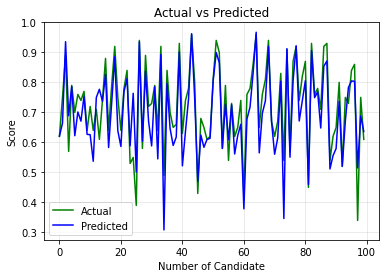

In [16]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3) # ???
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,prediction))

r_square score:  0.7502795216885347


In [18]:
# Tính loss:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.0048


0.004822352435439825

# Bài tập

## Regression sử dụng DNN với bộ dữ liệu BostonHousingData.csv (dự đoán giá nhà)